In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Энтропия по Шеннону

![](https://habrastorage.org/files/c96/80a/a4b/c9680aa4babc40f4bbc8b3595e203979.png)

In [ ]:
import math

def entropy(arr):
    probs = [arr.count(i)/len(arr) for i in list(set(arr))]
    return sum([-math.log(i, 2)*i for i in probs])

a = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]

entropy(a)

0.9927744539878084

In [ ]:
entropy(a[13:])

0.5916727785823275

In [ ]:
entropy(a[:13])

0.961236604722876

![](https://habrastorage.org/r/w1560/storage2/785/21c/7c6/78521c7c61114d0c433d76cb4f282f15.png)

In [ ]:
a = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
entr = entropy(a)

igs = []
appending = []
for i in range(1, len(a)-1):
    arr1 = a[:i]
    arr2 = a[i:]    
    print('split by x<=', i)
    appending.append('split by x<='+ str(i))
    print('entropies:', entropy(arr1), entropy(arr2))
    print('ig =', entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
    igs.append(entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
    print('---------------------')

split by x<= 1
entropies: 0.0 0.9980008838722996
ig = 0.044673614309123866
---------------------
split by x<= 2
entropies: 1.0 0.9910760598382222
ig = 0.0008060001334083688
---------------------
split by x<= 3
entropies: 0.9182958340544896 0.9774178175281716
ig = 0.024224933980689145
---------------------
split by x<= 4
entropies: 0.8112781244591328 0.9544340029249649
ig = 0.06697162675600987
---------------------
split by x<= 5
entropies: 0.7219280948873623 0.9182958340544896
ig = 0.12357055472510059
---------------------
split by x<= 6
entropies: 0.9182958340544896 0.9402859586706309
ig = 0.05908553270201988
---------------------
split by x<= 7
entropies: 0.9852281360342516 0.961236604722876
ig = 0.023140813305950858
---------------------
split by x<= 8
entropies: 1.0 0.9798687566511527
ig = 0.004853199997116753
---------------------
split by x<= 9
entropies: 0.9910760598382222 0.9940302114769565
ig = 7.361074828227121e-05
---------------------
split by x<= 10
entropies: 1.0 0.970950

## Максимизация энтропии

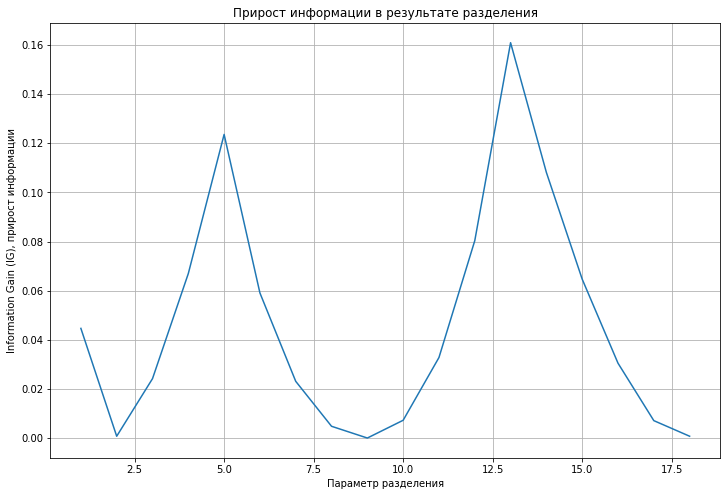

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot([i for i in range(1, 19)], igs)
ax.set_title('Прирост информации в результате разделения')
ax.set_ylabel('Information Gain (IG), прирост информации')
ax.set_xlabel(r'Параметр разделения')
ax.grid(True)
plt.show()

# Релазиация целого дерева

In [ ]:
# на основе https://habr.com/ru/company/mailru/blog/438560/
from sklearn.metrics import mean_squared_error

class RegressionTree():
    
    '''
    Класс RegressionTree решает задачу регрессии. Основан на рекурсивных
    вызовах, когда прописываются условия выхода из рекурсии. 
    '''
    
    def __init__(self, max_depth=3, n_epoch=10, min_size=8):
        
        '''
        Объявляем переменные класса.
        '''

        self.max_depth = max_depth # максимальная глубина
        self.min_size = min_size # минимальный размер поддерева
        self.value = 0 # значение в поддереве (среднее по всем листьям)
        self.feature_idx = -1 # номер лучшего признака
        self.feature_threshold = 0 # значение лучшего признака
        self.left = None # левый потомок
        self.right = None # правый потомок
        
    def fit(self, X, y):
        
        '''
        Процедура обучения дерева. На выходе получим обученную модель.
        '''
        
        # инициализируем начальные значения
        self.value = y.mean()
        base_error = ((y - self.value) ** 2).sum()
        error = base_error
        flag = 0
        
        # ошибки в левом и правом поддереве
        prev_error_left = base_error
        prev_error_right = 0
        
        # если дошли до глубины 0 - выходим
        if self.max_depth <= 1:
            return
    
        dim_shape = X.shape[1]
        
        # значения в левом и правом поддереве
        left_value = 0
        right_value = 0
        
        # начинаем цикл по признакам
        for feat in range(dim_shape):
            
            # сортируем признаки
            idxs = np.argsort(X[:, feat])
            
            # количество сэмплов в левом и правом поддереве
            N = X.shape[0]
            N1, N2 = N, 0
            thres = 1
            
            # начинаем проходиться по значениям признака
            while thres < N - 1:
                N1 -= 1
                N2 += 1
                
                idx = idxs[thres]
                x = X[idx, feat]
                
                # пропускаем одинаковые признаки
                if thres < N - 1 and x == X[idxs[thres + 1], feat]:

                    thres += 1
                    continue
                
                # данные, которые получаются у нас в результате такого сплита
                target_right = y[idxs][:thres]
                target_left = y[idxs][thres:]
                mean_right = y[idxs][:thres].mean(), 
                mean_left = y[idxs][thres:].mean()
                
                # на этом шаге уже нужно считать ошибку - 
                # генерируем предикты (среднее в потомках)
                left_shape = target_left.shape[0]
                right_shape = target_right.shape[0]
                mean_left_array = [mean_left for _ in range(left_shape)]
                mean_right_array = [mean_right for _ in range(right_shape)]
                
                # считаем ошибку слева и справа
                prev_error_left = N1/N * mean_squared_error(target_left, mean_left_array) 
                prev_error_right = N2/N * mean_squared_error(target_right, mean_right_array)
                
                # если выполняются условия сплита, то обновляем
                if (prev_error_left + prev_error_right < error):
                        if (min(N1,N2) > self.min_size):
                            self.feature_idx = feat
                            self.feature_threshold = x
                            left_value = mean_left
                            right_value = mean_right

                            flag = 1
                            error = prev_error_left + prev_error_right
                                     
                thres += 1
        
        # если не нашли лучший сплит, выходим
        if self.feature_idx == -1:
            return
        
        # дошли сюда - есть хорошее разбиение, нужно обучать дальше
        # инициализируем потомков - те же деревья решений
        self.left = RegressionTree(self.max_depth - 1)
        self.left.value = left_value
        self.right = RegressionTree(self.max_depth - 1)
        self.right.value = right_value
        
        # индексы потомков
        idxs_l = (X[:, self.feature_idx] > self.feature_threshold)
        idxs_r = (X[:, self.feature_idx] <= self.feature_threshold)
        
        # обучаем
        self.left.fit(X[idxs_l, :], y[idxs_l])
        self.right.fit(X[idxs_r, :], y[idxs_r])
        
    def __predict(self, x):
        
        '''
        Функция для генерирования предсказания - смотрим узлы, идем 
        в соответствующих  потомков и смотрим в конце self.value - это
        и будет ответом.
        '''
        
        if self.feature_idx == -1:
            return self.value
        
        if x[self.feature_idx] > self.feature_threshold:
            return self.left.__predict(x)
        else:
            return self.right.__predict(x)
        
    def predict(self, X):
        
        '''
        Предикт для матрицы - просто для каждой строчки вызываем __predict().
        '''
        
        y = np.zeros(X.shape[0])
        
        for i in range(X.shape[0]):
            y[i] = self.__predict(X[i])
            
        return y

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

data = datasets.fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['price'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
%%time
A = RegressionTree(2) # это наш алгоритм
A.fit(X_train, y_train)

CPU times: user 9min 27s, sys: 1.29 s, total: 9min 28s
Wall time: 9min 29s


In [ ]:
preds = A.predict(X_test)
preds

array([3.32504559, 1.73448086, 1.73448086, ..., 3.32504559, 1.73448086,
       1.73448086])

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.27781005197488884

In [ ]:
%%time
model = DecisionTreeRegressor(max_depth=2)
 # из Sklearn
model.fit(X_train, y_train)

CPU times: user 29.6 ms, sys: 1e+03 µs, total: 30.6 ms
Wall time: 32.4 ms


In [ ]:
r2_score(y_test, model.predict(X_test))

0.416218309964553

In [ ]:
from sklearn.model_selection import GridSearchCV

# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 10)],
              'max_features': [2, len(X_train[0])-1]}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5,  n_jobs=-1,scoring='r2', verbose=2)
gs.fit(X_train, y_train)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1040 out of 1040 | elapsed:   36.6s finished


({'max_depth': 9, 'max_features': 7, 'min_samples_split': 8},
 0.6952493907654766)

In [ ]:
# по умолчанию grid search refit-ит лучшую модель для predict
r2_score(y_test, gs.predict(X_test))

0.6938485507518735

In [ ]:
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(639.3704160094637, 1032.8400000000001, 'X[0] <= 5.075\nmse = 1.325\nsamples = 16512\nvalue = 2.073'),
 Text(354.22328470031545, 924.1200000000001, 'X[0] <= 3.106\nmse = 0.836\nsamples = 13110\nvalue = 1.745'),
 Text(187.2468454258675, 815.4000000000001, 'X[2] <= 4.216\nmse = 0.558\nsamples = 6394\nvalue = 1.363'),
 Text(100.77444794952682, 706.6800000000001, 'X[5] <= 2.469\nmse = 0.69\nsamples = 2387\nvalue = 1.648'),
 Text(50.16719242902208, 597.96, 'X[0] <= 2.285\nmse = 1.075\nsamples = 721\nvalue = 2.074'),
 Text(25.96372239747634, 489.24, 'X[6] <= 37.92\nmse = 0.947\nsamples = 348\nvalue = 1.742'),
 Text(14.082018927444794, 380.5200000000001, 'X[7] <= -118.245\nmse = 1.04\nsamples = 260\nvalue = 1.937'),
 Text(7.041009463722397, 271.80000000000007, 'X[6] <= 34.545\nmse = 1.237\nsamples = 149\nvalue = 2.219'),
 Text(3.5205047318611986, 163.08000000000004, 'X[3] <= 1.041\nmse = 0.862\nsamples = 66\nvalue = 2.66'),
 Text(1.7602523659305993, 54.36000000000013, 'mse = 0.493\nsampl

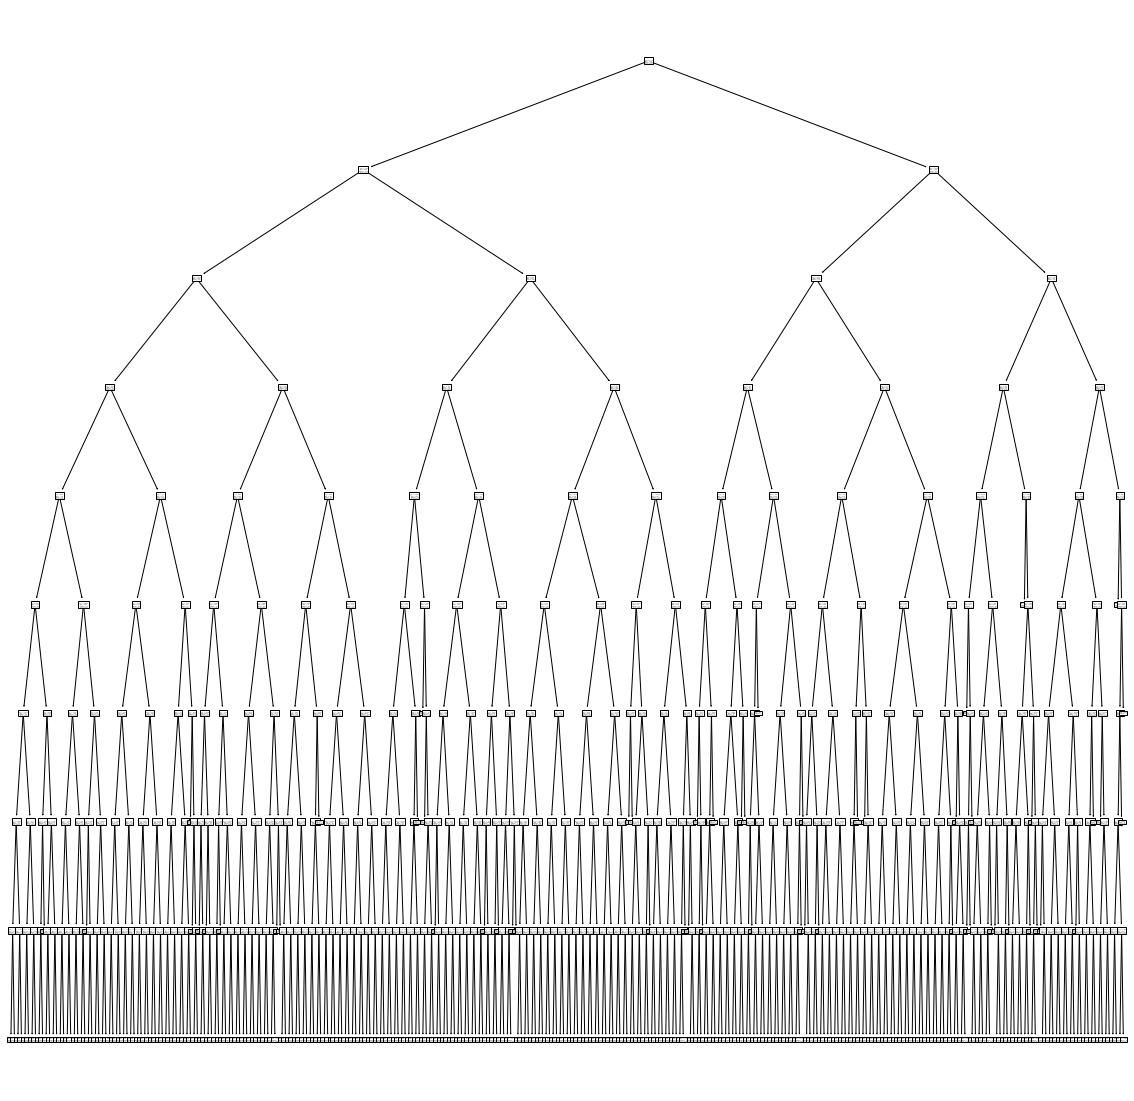

In [ ]:
from sklearn import tree
from matplotlib.pyplot import figure

figure(figsize=(20, 20))
tree.plot_tree(gs.best_estimator_)

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

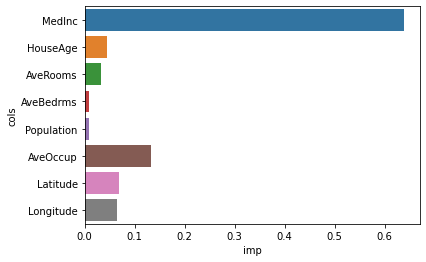

In [ ]:
sns.barplot(y='cols', x = 'imp',
    data = pd.DataFrame({'imp':gs.best_estimator_.feature_importances_, 'cols':df.columns[:-1]}), orient='h'
)

# Коробочные реализации на более реальных данных

Данные:

https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

## EDA

In [ ]:
import os

data = []
for file_ in os.listdir('./data'):
    df = pd.read_csv('./data/' + file_)
    data.append(df)

df = pd.concat(data, axis=0)
df.to_csv('./results.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('https://dl.uploadgram.me/6081b6b3d5d36h?raw').drop(columns=['Unnamed: 0'])
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,5,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,fuel type,engine size,mileage2,fuel type2,engine size2,reference,tax(£)
0,T-Roc,2019.0,25000,Automatic,13904,Diesel,145.0,49.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T-Roc,2019.0,26883,Automatic,4562,Diesel,145.0,49.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T-Roc,2019.0,20000,Manual,7414,Diesel,145.0,50.4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T-Roc,2019.0,33492,Automatic,4825,Petrol,145.0,32.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T-Roc,2019.0,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118145,I30,2016.0,8680,Manual,25906,Diesel,NaN,78.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0
118146,I40,2015.0,7830,Manual,59508,Diesel,NaN,65.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,30.0
118147,I10,2017.0,6830,Manual,13810,Petrol,NaN,60.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0
118148,Tucson,2018.0,13994,Manual,23313,Petrol,NaN,44.8,1.6,NaN,NaN,NaN,NaN,NaN,NaN,145.0


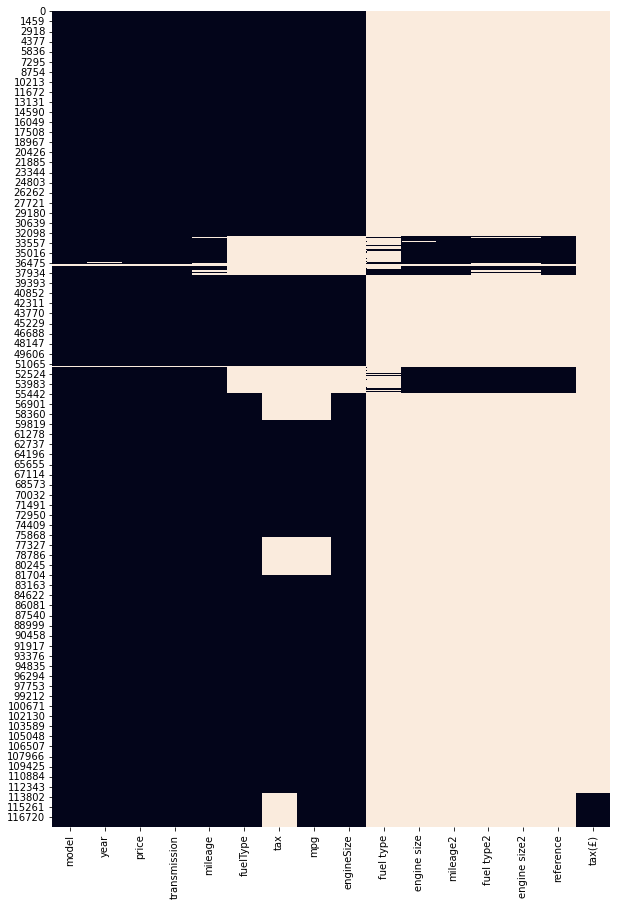

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.drop(columns = df.columns[9:])

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019.0,25000,Automatic,13904,Diesel,145.0,49.6,2.0
1,T-Roc,2019.0,26883,Automatic,4562,Diesel,145.0,49.6,2.0
2,T-Roc,2019.0,20000,Manual,7414,Diesel,145.0,50.4,2.0
3,T-Roc,2019.0,33492,Automatic,4825,Petrol,145.0,32.5,2.0
4,T-Roc,2019.0,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5
...,...,...,...,...,...,...,...,...,...
118145,I30,2016.0,8680,Manual,25906,Diesel,NaN,78.4,1.6
118146,I40,2015.0,7830,Manual,59508,Diesel,NaN,65.7,1.7
118147,I10,2017.0,6830,Manual,13810,Petrol,NaN,60.1,1.0
118148,Tucson,2018.0,13994,Manual,23313,Petrol,NaN,44.8,1.6


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019.0,25000,Automatic,13904,Diesel,145.0,49.6,2.0
1,T-Roc,2019.0,26883,Automatic,4562,Diesel,145.0,49.6,2.0
2,T-Roc,2019.0,20000,Manual,7414,Diesel,145.0,50.4,2.0
3,T-Roc,2019.0,33492,Automatic,4825,Petrol,145.0,32.5,2.0
4,T-Roc,2019.0,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5
...,...,...,...,...,...,...,...,...,...
94322,Tigra,2007.0,2499,Manual,48640,Petrol,165.0,46.3,1.4
94323,Vectra,2007.0,1795,Manual,75000,Petrol,240.0,39.2,1.8
94324,Vectra,2005.0,1495,Manual,74000,Petrol,235.0,38.7,1.8
94325,Vectra,2008.0,1695,Automatic,131000,Diesel,200.0,39.8,1.9


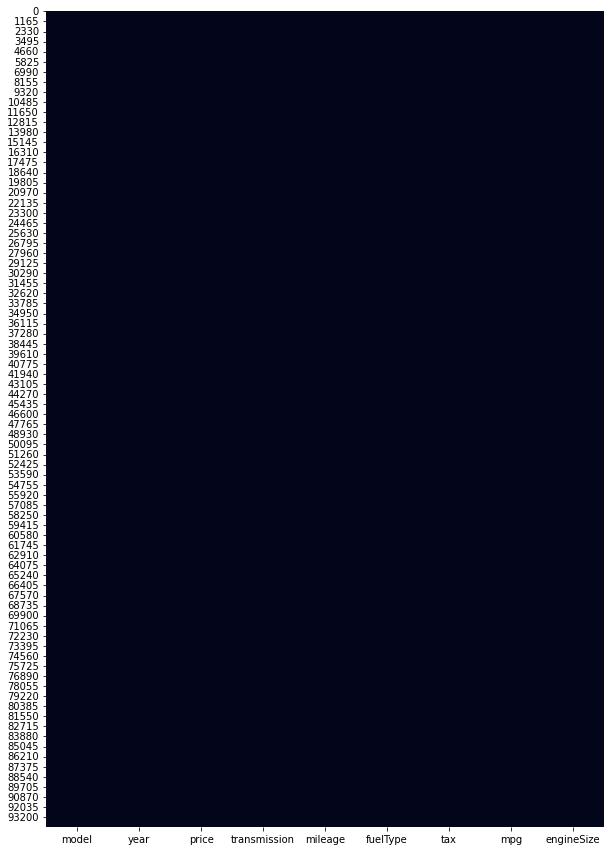

In [ ]:
df.drop(columns = df.columns[9:], inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)
del df['index']
# del df['level_0']

figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94327 entries, 0 to 94326
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         94327 non-null  object 
 1   year          94327 non-null  float64
 2   price         94327 non-null  object 
 3   transmission  94327 non-null  object 
 4   mileage       94327 non-null  object 
 5   fuelType      94327 non-null  object 
 6   tax           94327 non-null  float64
 7   mpg           94327 non-null  float64
 8   engineSize    94327 non-null  float64
dtypes: float64(4), object(5)
memory usage: 6.5+ MB


In [ ]:
df.describe()

,year,tax,mpg,engineSize
count,94327.000000,94327.000000,94327.000000,94327.000000
mean,2017.086698,120.256183,55.235816,1.673861
std,2.133897,63.404805,16.291667,0.562523
min,1970.000000,0.000000,0.300000,0.000000
25%,2016.000000,125.000000,47.100000,1.300000
50%,2017.000000,145.000000,54.300000,1.600000
75%,2019.000000,145.000000,62.800000,2.000000
max,2060.000000,580.000000,470.800000,6.600000


In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# del df['index']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f253d0adbd0>,
      dtype=object)

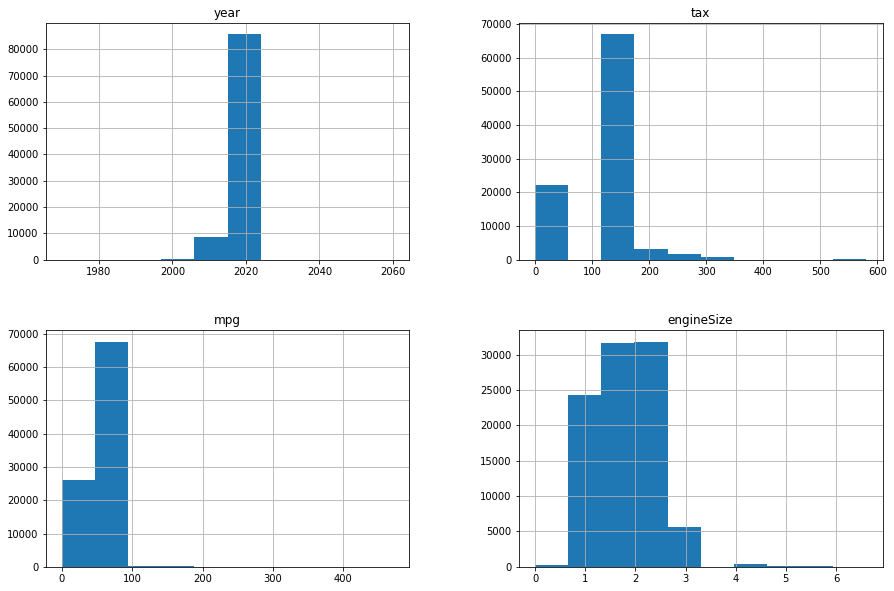

In [ ]:
df.hist(figsize=(15, 10))

In [ ]:
df.model.value_counts()

 Fiesta             6557
 Golf               4863
 Focus              4588
 C Class            3747
 Corsa              3441
                    ... 
 A2                    1
 Transit Tourneo       1
200                    1
 Ranger                1
180                    1
Name: model, Length: 179, dtype: int64

In [ ]:
df['model'] = df['model'].apply(lambda x: x.strip())

In [ ]:
df['model'].value_counts()

Fiesta             6557
Golf               4863
Focus              4588
C Class            3747
Corsa              3441
                   ... 
A2                    1
Transit Tourneo       1
200                   1
Ranger                1
180                   1
Name: model, Length: 179, dtype: int64

In [ ]:
df.year.describe()

count    94327.000000
mean      2017.086698
std          2.133897
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2060.000000
Name: year, dtype: float64

In [ ]:
df[df['year'] >= 2021]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
80456,Fiesta,2060.0,6495,Automatic,54807,Petrol,205.0,42.8,1.4


In [ ]:
df = df[df['year'] < 2021]
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019.0,25000,Automatic,13904,Diesel,145.0,49.6,2.0
1,T-Roc,2019.0,26883,Automatic,4562,Diesel,145.0,49.6,2.0
2,T-Roc,2019.0,20000,Manual,7414,Diesel,145.0,50.4,2.0
3,T-Roc,2019.0,33492,Automatic,4825,Petrol,145.0,32.5,2.0
4,T-Roc,2019.0,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5
...,...,...,...,...,...,...,...,...,...
94322,Tigra,2007.0,2499,Manual,48640,Petrol,165.0,46.3,1.4
94323,Vectra,2007.0,1795,Manual,75000,Petrol,240.0,39.2,1.8
94324,Vectra,2005.0,1495,Manual,74000,Petrol,235.0,38.7,1.8
94325,Vectra,2008.0,1695,Automatic,131000,Diesel,200.0,39.8,1.9


In [ ]:
df.describe()

,year,tax,mpg,engineSize
count,94326.000000,94326.000000,94326.000000,94326.000000
mean,2017.086243,120.255285,55.235948,1.673864
std,2.129329,63.404540,16.291703,0.562525
min,1970.000000,0.000000,0.300000,0.000000
25%,2016.000000,125.000000,47.100000,1.300000
50%,2017.000000,145.000000,54.300000,1.600000
75%,2019.000000,145.000000,62.800000,2.000000
max,2020.000000,580.000000,470.800000,6.600000


Перекодировка позволит модели упростить обработку

In [ ]:
df['price'] = df['price'].astype('int')
df['year'] = df['year'].astype('object')
df['mpg'] = df['mpg'].astype('int')
df['mileage'] = df['mileage'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

# Кодировка

Рассмотрим 2 основных подхода к кодировке, выберем лучший по метрикам качества в алгоритмах

## Label encoder

In [ ]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            print(column)
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

# используем все, кроме описания
encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data

model
year
transmission
fuelType


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,144,24,25000,0,13904,0,145.0,49,2.0
1,144,24,26883,0,4562,0,145.0,49,2.0
2,144,24,20000,1,7414,0,145.0,50,2.0
3,144,24,33492,0,4825,4,145.0,32,2.0
4,144,24,22900,3,6500,4,150.0,39,1.5
...,...,...,...,...,...,...,...,...,...
94322,146,12,2499,1,48640,4,165.0,46,1.4
94323,157,12,1795,1,75000,4,240.0,39,1.8
94324,157,10,1495,1,74000,4,235.0,38,1.8
94325,157,13,1695,0,131000,0,200.0,39,1.9


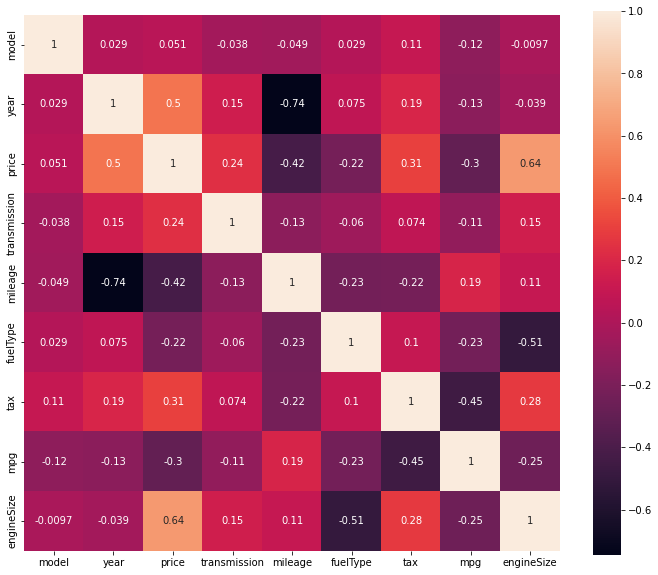

In [ ]:
plt.subplots(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), square = True, annot=True)
plt.show()

Видим, что присутсвуют линейные корреляции, неплохой результат выдадут даже самые простые модели.

## One-hot

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
df.reset_index(inplace=True)

In [ ]:
del df['index']

In [ ]:
# data_onehot = pd.get_dummies(df, columns=['model', 'transmission','fuelType'])

from sklearn.preprocessing import OneHotEncoder
# выделяем в DataFrame категориальные колонки (тип - object)
# df.select_dtypes(include = np.object)
categor = df[['model', 'transmission','fuelType', 'year']]

# в случае, если появляется неизвестных новых - игнорируем
enc = OneHotEncoder(handle_unknown='ignore')
# выбираем какие на основе каких признаков производить преобразования
enc.fit(categor)
# производим преобразования категориальных
codes = enc.transform(categor).toarray()
# выделим названия категориальных колонок из тех, на основе которых преобразуем
feature_names = enc.get_feature_names(categor.columns)
# объединяем числовые и категориальные колонки

data_onehot = pd.concat([df[['price', 'mileage', 'tax', 'mpg', 'engineSize']], # исключаем категориальные = выбираем цифровые
                        pd.DataFrame(codes,columns=feature_names)], axis = 1) # выбираем закодированные

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data_onehot

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,model_230,model_3 Series,model_4 Series,model_5 Series,model_6 Series,model_7 Series,model_8 Series,model_A Class,model_A1,model_A2,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_Adam,model_Agila,model_Amarok,model_Ampera,model_Antara,model_Arteon,model_Astra,model_Auris,model_Avensis,model_Aygo,model_B Class,model_B-MAX,model_Beetle,model_C Class,...,model_Z4,model_Zafira,model_Zafira Tourer,model_i3,model_i8,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,year_1970.0,year_1996.0,year_1997.0,year_1998.0,year_1999.0,year_2000.0,year_2001.0,year_2002.0,year_2003.0,year_2004.0,year_2005.0,year_2006.0,year_2007.0,year_2008.0,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,25000,13904,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26883,4562,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20000,7414,145.0,50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33492,4825,145.0,32,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22900,6500,150.0,39,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94321,2499,48640,165.0,46,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94322,1795,75000,240.0,39,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94323,1495,74000,235.0,38,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94324,1695,131000,20

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019.0,25000,Automatic,13904,Diesel,145.0,49,2.0
1,T-Roc,2019.0,26883,Automatic,4562,Diesel,145.0,49,2.0
2,T-Roc,2019.0,20000,Manual,7414,Diesel,145.0,50,2.0
3,T-Roc,2019.0,33492,Automatic,4825,Petrol,145.0,32,2.0
4,T-Roc,2019.0,22900,Semi-Auto,6500,Petrol,150.0,39,1.5
...,...,...,...,...,...,...,...,...,...
94322,Tigra,2007.0,2499,Manual,48640,Petrol,165.0,46,1.4
94323,Vectra,2007.0,1795,Manual,75000,Petrol,240.0,39,1.8
94324,Vectra,2005.0,1495,Manual,74000,Petrol,235.0,38,1.8
94325,Vectra,2008.0,1695,Automatic,131000,Diesel,200.0,39,1.9


In [ ]:
df.dtypes

model            object
year             object
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg               int64
engineSize      float64
dtype: object

In [ ]:
cat_cols = ['model', 'transmission','fuelType', 'year']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto', sparse=False), [0, 1, 2, 4])],
    remainder='passthrough'                                      
)

X = ct.fit_transform(df.drop(columns=['price']).values )

# enc.get_feature_names()
X

array([[0.0, 0.0, 0.0, ..., 145.0, 49, 2.0],
       [0.0, 0.0, 0.0, ..., 145.0, 49, 2.0],
       [0.0, 0.0, 0.0, ..., 145.0, 50, 2.0],
       ...,
       [0.0, 0.0, 0.0, ..., 235.0, 38, 1.8],
       [0.0, 0.0, 0.0, ..., 200.0, 39, 1.9],
       [0.0, 0.0, 0.0, ..., 330.0, 27, 3.2]], dtype=object)

In [ ]:
ct.get_feature_names()

NotImplementedError: ignored

In [ ]:
ct.transformers_[1][2]

NameError: ignored

In [ ]:
ct.transformers_[0][1].categories_

[array(['1 Series', '180', '2 Series', '200', '220', '230', '3 Series',
        '4 Series', '5 Series', '6 Series', '7 Series', '8 Series',
        'A Class', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Adam',
        'Agila', 'Amarok', 'Ampera', 'Antara', 'Arteon', 'Astra', 'Auris',
        'Avensis', 'Aygo', 'B Class', 'B-MAX', 'Beetle', 'C Class', 'C-HR',
        'C-MAX', 'CC', 'CL Class', 'CLA Class', 'CLC Class', 'CLK',
        'CLS Class', 'Caddy', 'Caddy Life', 'Caddy Maxi',
        'Caddy Maxi Life', 'California', 'Camry', 'Caravelle', 'Cascada',
        'Citigo', 'Combo Life', 'Corolla', 'Corsa', 'Crossland X',
        'E Class', 'EcoSport', 'Edge', 'Eos', 'Escort', 'Fabia', 'Fiesta',
        'Focus', 'Fox', 'Fusion', 'G Class', 'GL Class', 'GLA Class',
        'GLB Class', 'GLC Class', 'GLE Class', 'GLS Class', 'GT86', 'GTC',
        'Galaxy', 'Golf', 'Golf SV', 'Grand C-MAX',
        'Grand Tourneo Connect', 'Grandland X', 'Hilux', 'IQ', 'Insignia',
        'Jetta', 'KA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94326 entries, 0 to 94326
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         94326 non-null  object 
 1   year          94326 non-null  object 
 2   price         94326 non-null  int64  
 3   transmission  94326 non-null  object 
 4   mileage       94326 non-null  int64  
 5   fuelType      94326 non-null  object 
 6   tax           94326 non-null  float64
 7   mpg           94326 non-null  int64  
 8   engineSize    94326 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 9.2+ MB


In [ ]:
np.unique(df['model'])

array(['1 Series', '180', '2 Series', '200', '220', '230', '3 Series',
       '4 Series', '5 Series', '6 Series', '7 Series', '8 Series',
       'A Class', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Adam',
       'Agila', 'Amarok', 'Ampera', 'Antara', 'Arteon', 'Astra', 'Auris',
       'Avensis', 'Aygo', 'B Class', 'B-MAX', 'Beetle', 'C Class', 'C-HR',
       'C-MAX', 'CC', 'CL Class', 'CLA Class', 'CLC Class', 'CLK',
       'CLS Class', 'Caddy', 'Caddy Life', 'Caddy Maxi',
       'Caddy Maxi Life', 'California', 'Camry', 'Caravelle', 'Cascada',
       'Citigo', 'Combo Life', 'Corolla', 'Corsa', 'Crossland X',
       'E Class', 'EcoSport', 'Edge', 'Eos', 'Escort', 'Fabia', 'Fiesta',
       'Focus', 'Fox', 'Fusion', 'G Class', 'GL Class', 'GLA Class',
       'GLB Class', 'GLC Class', 'GLE Class', 'GLS Class', 'GT86', 'GTC',
       'Galaxy', 'Golf', 'Golf SV', 'Grand C-MAX',
       'Grand Tourneo Connect', 'Grandland X', 'Hilux', 'IQ', 'Insignia',
       'Jetta', 'KA', 'Ka+', 'Kadj

In [ ]:
enc.categories_

[array(['1 Series', '180', '2 Series', '200', '220', '230', '3 Series',
        '4 Series', '5 Series', '6 Series', '7 Series', '8 Series',
        'A Class', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Adam',
        'Agila', 'Amarok', 'Ampera', 'Antara', 'Arteon', 'Astra', 'Auris',
        'Avensis', 'Aygo', 'B Class', 'B-MAX', 'Beetle', 'C Class', 'C-HR',
        'C-MAX', 'CC', 'CL Class', 'CLA Class', 'CLC Class', 'CLK',
        'CLS Class', 'Caddy', 'Caddy Life', 'Caddy Maxi',
        'Caddy Maxi Life', 'California', 'Camry', 'Caravelle', 'Cascada',
        'Citigo', 'Combo Life', 'Corolla', 'Corsa', 'Crossland X',
        'E Class', 'EcoSport', 'Edge', 'Eos', 'Escort', 'Fabia', 'Fiesta',
        'Focus', 'Fox', 'Fusion', 'G Class', 'GL Class', 'GLA Class',
        'GLB Class', 'GLC Class', 'GLE Class', 'GLS Class', 'GT86', 'GTC',
        'Galaxy', 'Golf', 'Golf SV', 'Grand C-MAX',
        'Grand Tourneo Connect', 'Grandland X', 'Hilux', 'IQ', 'Insignia',
        'Jetta', 'KA

In [ ]:
# pd.concat(new_data.select_dtypes(dtypes = np.numeric), enc.transform(new_data.select_dtypes(dtypes=np.object)), axis=1 )

In [ ]:
data_onehot

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,model_230,model_3 Series,model_4 Series,model_5 Series,model_6 Series,model_7 Series,model_8 Series,model_A Class,model_A1,model_A2,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_Adam,model_Agila,model_Amarok,model_Ampera,model_Antara,model_Arteon,model_Astra,model_Auris,model_Avensis,model_Aygo,model_B Class,model_B-MAX,model_Beetle,model_C Class,...,model_Z4,model_Zafira,model_Zafira Tourer,model_i3,model_i8,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,year_1970.0,year_1996.0,year_1997.0,year_1998.0,year_1999.0,year_2000.0,year_2001.0,year_2002.0,year_2003.0,year_2004.0,year_2005.0,year_2006.0,year_2007.0,year_2008.0,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,25000.0,13904.0,145.0,49.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26883.0,4562.0,145.0,49.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20000.0,7414.0,145.0,50.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33492.0,4825.0,145.0,32.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22900.0,6500.0,150.0,39.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94322,2499.0,48640.0,165.0,46.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94323,1795.0,75000.0,240.0,39.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94324,1495.0,74000.0,235.0,38.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
df.shape

(94326, 9)

In [ ]:
data_onehot.reset_index(inplace=True)
data_onehot.shape

(94326, 220)

In [ ]:
data_onehot.head()

,index,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,model_230,model_3 Series,model_4 Series,model_5 Series,model_6 Series,model_7 Series,model_8 Series,model_A Class,model_A1,model_A2,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_Adam,model_Agila,model_Amarok,model_Ampera,model_Antara,model_Arteon,model_Astra,model_Auris,model_Avensis,model_Aygo,model_B Class,model_B-MAX,model_Beetle,...,model_Z4,model_Zafira,model_Zafira Tourer,model_i3,model_i8,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,year_1970.0,year_1996.0,year_1997.0,year_1998.0,year_1999.0,year_2000.0,year_2001.0,year_2002.0,year_2003.0,year_2004.0,year_2005.0,year_2006.0,year_2007.0,year_2008.0,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,0,25000,13904,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,26883,4562,145.0,49,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,20000,7414,145.0,50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,33492,4825,145.0,32,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,22900,6500,150.0,39,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_onehot.dropna(inplace=True)

In [ ]:
del data_onehot['index']

In [ ]:
# названия признаков - запомним, понадобится при оценки важности признаков
data_onehot.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_1 Series',
       'model_180', 'model_2 Series', 'model_200', 'model_220',
       ...
       'year_2011.0', 'year_2012.0', 'year_2013.0', 'year_2014.0',
       'year_2015.0', 'year_2016.0', 'year_2017.0', 'year_2018.0',
       'year_2019.0', 'year_2020.0'],
      dtype='object', length=219)

## Train-test split

Разделим на треин-тест для обоих методов кодировки

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_onehot.drop(columns=['price']), data_onehot['price'], test_size=0.2)

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(encoded_data.drop(['price'], axis=1), encoded_data['price'], test_size=0.2)

# Алгоритмы

In [ ]:
X_train

,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,model_230,model_3 Series,model_4 Series,model_5 Series,model_6 Series,model_7 Series,model_8 Series,model_A Class,model_A1,model_A2,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_Adam,model_Agila,model_Amarok,model_Ampera,model_Antara,model_Arteon,model_Astra,model_Auris,model_Avensis,model_Aygo,model_B Class,model_B-MAX,model_Beetle,model_C Class,model_C-HR,...,model_Z4,model_Zafira,model_Zafira Tourer,model_i3,model_i8,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,year_1970.0,year_1996.0,year_1997.0,year_1998.0,year_1999.0,year_2000.0,year_2001.0,year_2002.0,year_2003.0,year_2004.0,year_2005.0,year_2006.0,year_2007.0,year_2008.0,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
12540,200,145.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67637,29570,125.0,52,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32420,55965,205.0,42,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87155,1759,145.0,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
83571,32484,150.0,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74133,19175,150.0,48,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52239,34011,145.0,34,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75332,44525,145.0,67,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56007,5

Нормализация

In [ ]:
mean = X_train.iloc[:,:4].mean(axis=0)

In [ ]:
std = X_train.iloc[:,:4].std(axis=0)

In [ ]:
mean

mileage       23094.929512
tax             120.176981
mpg              54.814365
engineSize        1.674078
dtype: float64

In [ ]:
std

mileage       21237.419807
tax              63.290850
mpg              16.363755
engineSize        0.561399
dtype: float64

In [ ]:
X_train.iloc[:,:4] = (X_train.iloc[:,:4] - mean)/std

In [ ]:
X_test.iloc[:,:4] = (X_test.iloc[:,:4] - mean)/std

In [ ]:
X_train.describe()

,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,model_230,model_3 Series,model_4 Series,model_5 Series,model_6 Series,model_7 Series,model_8 Series,model_A Class,model_A1,model_A2,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_Adam,model_Agila,model_Amarok,model_Ampera,model_Antara,model_Arteon,model_Astra,model_Auris,model_Avensis,model_Aygo,model_B Class,model_B-MAX,model_Beetle,model_C Class,model_C-HR,...,model_Z4,model_Zafira,model_Zafira Tourer,model_i3,model_i8,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,year_1970.0,year_1996.0,year_1997.0,year_1998.0,year_1999.0,year_2000.0,year_2001.0,year_2002.0,year_2003.0,year_2004.0,year_2005.0,year_2006.0,year_2007.0,year_2008.0,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
count,7.546000e+04,7.546000e+04,7.546000e+04,7.546000e+04,75460.000000,75460.000000,75460.000000,75460.0,75460.000000,75460.0,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,...,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000,75460.000000
mean,-7.532185e-17,-1.539040e-15,7.183802e-16,5.102615e-14,0.021323,0.000013,0.013080,0.0,0.000013,0.0,0.025948,0.010920,0.010986,0.001219,0.001126,0.000464,0.027100,0.014140,0.000013,0.020488,0.014842,0.009396,0.008110,0.001219,0.001232,0.005168,0.000278,0.001126,0.000040,0.000278,0.002783,0.030069,0.007713,0.001166,0.020660,0.006149,0.003711,0.000795,0.039889,0.005182,...,0.001179,0.006202,0.000610,0.000464,0.000186,0.204784,0.559290,0.000066,0.235860,0.416658,0.000066,0.029141,0.002584,0.551550,0.000027,0.000027,0.000040,0.000053,0.000080,0.000080,0.000225,0.000318,0.000345,0.000477,0.000649,0.000835,0.001550,0.002134,0.002796,0.003300,0.004294,0.006348,0.026398,0.041505,0.077737,0.159754,0.218434,0.134164,0.271826,0.046607
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.144458,0.003640,0.113617,0.0,0.003640,0.0,0.158980,0.103926,0.104237,0.034896,0.033544,0.021532,0.162377,0.118069,0.003640,0.141662,0.120922,0.096476,0.089692,0.034896,0.035085,0.071705,0.016680,0.033544,0.006305,0.016680,0.052680,0.170778,0.087483,0.034130,0.142244,0.078174,0.060802,0.028187,0.195699,0.071797,...,0.034323,0.078508,0.024683,0.021532,0.013620,0.403546,0.496476,0.008140,0.424538,0.493008,0.008140,0.168204,0.050769,0.497339,0.005148,0.005148,0.006305,0.007281,0.008917,0.008917,0.015008,0.017831,0.018559,0.021837,0.025474,0.028882,0.039346,0.046142,0.052805,0.057349,0.065386,0.079420,0.160317,0.199457,0.267758,0.366380,0.413186,0.340830,0.444904,0.210798
min,-1.087417e+00,-1.898805e+00,-3.349742e+00,-2.981977e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
pd.DataFrame(X_train).isna().sum()

mileage           0
tax               0
mpg               0
engineSize        0
model_1 Series    0
                 ..
year_2016.0       0
year_2017.0       0
year_2018.0       0
year_2019.0       0
year_2020.0       0
Length: 218, dtype: int64

## Linear regression

In [ ]:
y_train

44851    17500.0
579      19691.0
18966    30403.0
28972     8998.0
3053     12500.0
          ...   
49324    12295.0
37912    26140.0
55647    11991.0
12961     5695.0
377      22052.0
Name: price, Length: 75460, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
regressor = Ridge()
regressor.fit(X_train.values, y_train.values)

from sklearn import metrics
preds = regressor.predict(X_test.values)

print(metrics.r2_score(y_test, preds))

0.890448228656828


In [ ]:
# label encoder

from sklearn.linear_model import LinearRegression
regressor = Ridge()
regressor.fit(X_train_.values, y_train_.values)

from sklearn import metrics
preds = regressor.predict(X_test_.values)

print(metrics.r2_score(y_test_, preds))

0.7114221420621933


## SVR

In [ ]:
from sklearn.svm import SVR

svr = SVR()

In [ ]:
svr.fit(X_train.values, y_train.values)

from sklearn import metrics
preds = svr.predict(X_test.values)

print(metrics.r2_score(y_test, preds))

## Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(X_train.values, y_train.values)

from sklearn import metrics
preds = tree.predict(X_test.values)

print(metrics.r2_score(y_test, preds))

0.9193725343911433


## Random forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

trees = RandomForestRegressor()

trees.fit(X_train.values, y_train.values)

from sklearn import metrics
preds = trees.predict(X_test.values)

print(metrics.r2_score(y_test, preds))

0.9541984365936629


In [ ]:
metrics.mean_absolute_percentage_error(y_test, preds)

0.08152830136296402

### Feat importance from Random Forest

In [ ]:
import matplotlib.pyplot as plt
def plot_feature_imp(rf, column_names, top_n):
    
    assert len(rf.feature_importances_) == len(column_names)
    data = pd.DataFrame({'imp':rf.feature_importances_, 'cols':column_names})
    data.sort_values('imp', inplace = True, ascending=False)
    plt.figure(figsize=(15, 10))
    sns.barplot(y='cols', x = 'imp',
        data = data[:top_n], orient='h'
    )
    plt.show()

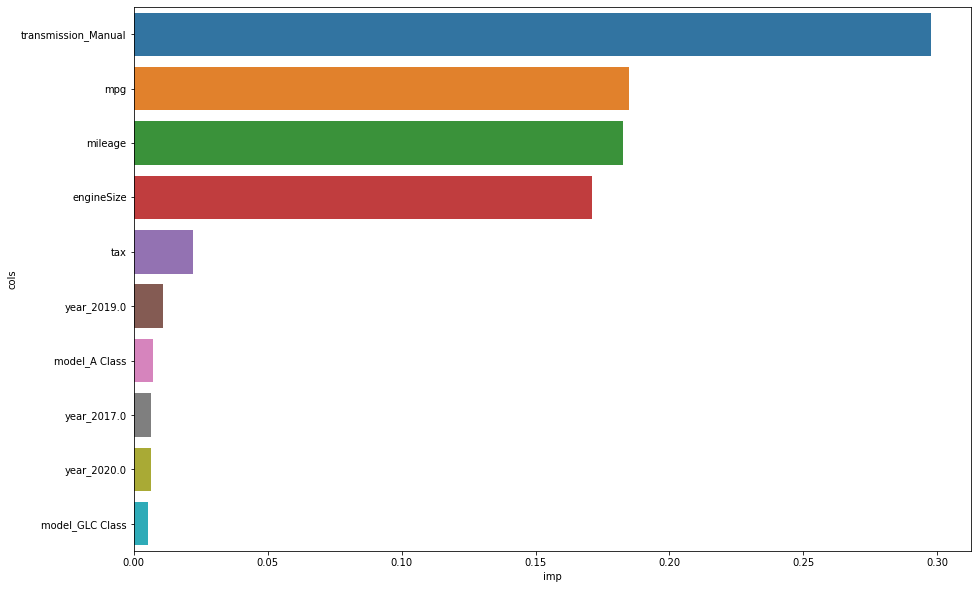

In [ ]:
plot_feature_imp(trees, data_onehot.columns[1:], 10)

In [ ]:
df[-2:].select_dtypes(include=np.number)

,price,mileage,tax,mpg,engineSize
94324,1695,131000,200.0,39,1.9
94325,1450,147000,330.0,27,3.2


In [ ]:
df[-2:].select_dtypes(include=np.number).drop(columns=['price'])

,mileage,tax,mpg,engineSize
94324,131000,200.0,39,1.9
94325,147000,330.0,27,3.2


In [ ]:
df[-2:].select_dtypes(include=np.object)

,model,year,transmission,fuelType
94324,Vectra,2008.0,Automatic,Diesel
94325,Vectra,2005.0,Manual,Petrol


In [ ]:
df[-2:].select_dtypes(include=np.number).values

array([[1.695e+03, 1.310e+05, 2.000e+02, 3.900e+01, 1.900e+00],
       [1.450e+03, 1.470e+05, 3.300e+02, 2.700e+01, 3.200e+00]])

In [ ]:
mean.values, std.values

(array([2.30949295e+04, 1.20176981e+02, 5.48143652e+01, 1.67407766e+00]),
 array([2.12374198e+04, 6.32908504e+01, 1.63637551e+01, 5.61398504e-01]))

array([[ 5.08089361,  1.26120945, -0.96642642,  0.40242776],
       [ 5.83428079,  3.31521883, -1.69975443,  2.7180734 ]])

# Inference stage (deploy func)

In [ ]:
# .drop(columns=['price']) - вот этого не будет в реальных данных на прогноз
digital_data = df[-2:].select_dtypes(include=np.number).drop(columns=['price']).values
# стандартизация для новых данных для числовых колонок
digital_data = (digital_data - mean.values) / std.values
# выбор категориальных колонок
categorical_data = df[-2:].select_dtypes(include=np.object)
# конвертация категориальных колонок в нампай массивы
categorical_data = enc.transform(categorical_data).toarray()
# конкатенация стандарьтизованных числовых колонок и категориальных one-hot колонок 
data_to_pred = np.concatenate((digital_data, categorical_data), axis=1)

assert data_to_pred.shape[1] == X_train.shape[1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
trees.predict(data_to_pred)

array([3087.14, 5501.12])

In [ ]:
df[-2:]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94324,Vectra,2008.0,1695,Automatic,131000,Diesel,200.0,39,1.9
94325,Vectra,2005.0,1450,Manual,147000,Petrol,330.0,27,3.2


In [ ]:
enc.categories_

[array(['1 Series', '180', '2 Series', '200', '220', '230', '3 Series',
        '4 Series', '5 Series', '6 Series', '7 Series', '8 Series',
        'A Class', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Adam',
        'Agila', 'Amarok', 'Ampera', 'Antara', 'Arteon', 'Astra', 'Auris',
        'Avensis', 'Aygo', 'B Class', 'B-MAX', 'Beetle', 'C Class', 'C-HR',
        'C-MAX', 'CC', 'CL Class', 'CLA Class', 'CLC Class', 'CLK',
        'CLS Class', 'Caddy', 'Caddy Life', 'Caddy Maxi',
        'Caddy Maxi Life', 'California', 'Camry', 'Caravelle', 'Cascada',
        'Citigo', 'Combo Life', 'Corolla', 'Corsa', 'Crossland X',
        'E Class', 'EcoSport', 'Edge', 'Eos', 'Escort', 'Fabia', 'Fiesta',
        'Focus', 'Fox', 'Fusion', 'G Class', 'GL Class', 'GLA Class',
        'GLB Class', 'GLC Class', 'GLE Class', 'GLS Class', 'GT86', 'GTC',
        'Galaxy', 'Golf', 'Golf SV', 'Grand C-MAX',
        'Grand Tourneo Connect', 'Grandland X', 'Hilux', 'IQ', 'Insignia',
        'Jetta', 'KA

## Random forest hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 10)],
              'max_features': [2, len(X_train[0])-1]}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(RandomForestRegressor(), param_grid, cv=5,  n_jobs=-1,scoring='r2', verbose=2)
gs.fit(X_train, y_train)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

## Best random forest by HP feature importance

In [ ]:
import matplotlib.pyplot as plt
def plot_feature_imp(gs, column_names, top_n):
    data = pd.DataFrame({'imp':gs.best_estimator_.feature_importances_, 'cols':df.columns[1:]})
    data.sort_values('imp', implace = True, ascending=False)
    plt.figure(figsize=(15, 10))
    sns.barplot(y='cols', x = 'imp',
        data = data[:top_n], orient='h'
    )
    plt.show()

In [ ]:
plot_feature_imp(gs, data_onehot.column, 10)